In [4]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis

In [9]:
df = dataset.copy()
# Check duplicated data
print("Data Sebelum Pemeriksaan Duplikat")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat
(25, 2)


<Figure size 1200x600 with 0 Axes>

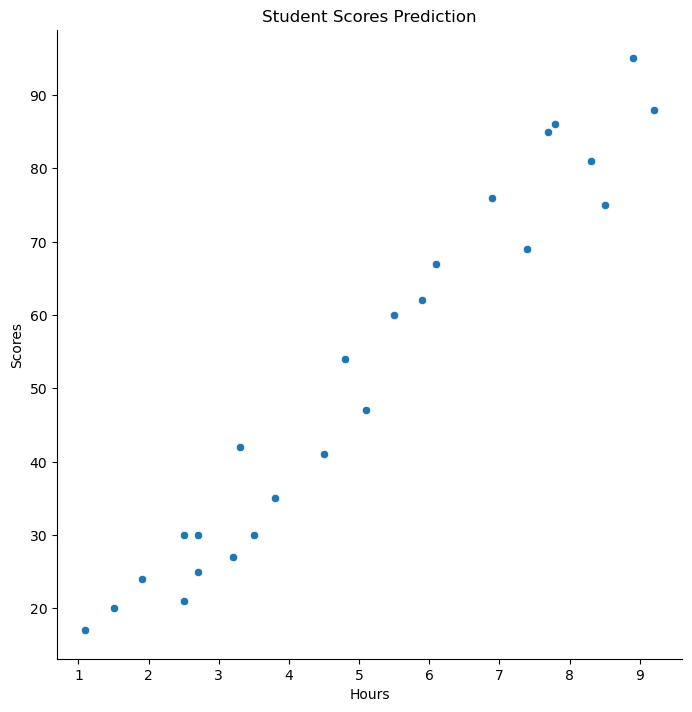

In [11]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize = (12, 6))
sns.pairplot(dataset, x_vars = ['Hours'], y_vars = ['Scores'], height = 7, kind = 'scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Scores Prediction')
plt.show()

In [13]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [15]:
df = df.drop_duplicates()
print("\nData Setelah Pemeriksaan Duplikat")
print(df.shape)


Data Setelah Pemeriksaan Duplikat
(25, 2)


In [17]:
# Check Missing Value
df.isna().sum() # isna artinya apakah ada nilai kosong/tidak

Hours     0
Scores    0
dtype: int64

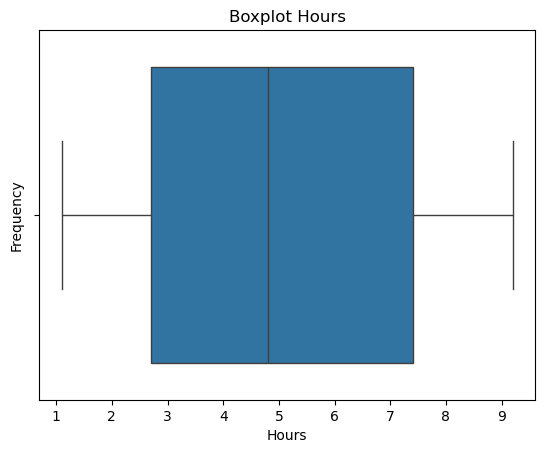

In [19]:
#Outlier Analysis
sns.boxplot(x = "Hours", data = df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Boxplot Hours")

# Menampilkan plot
plt.show()

Splitting the Data

In [22]:
# Hours data
x = dataset['Hours']
x.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [24]:
# Scores data
y = dataset['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [26]:
# Import machine learning from scikit learn
from sklearn.model_selection import train_test_split

In [27]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70 : 30 atau 85 : 15
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 42)

Linear Regression

In [31]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [33]:
# Create new axis for x column in array
import numpy as np
# Convert x_train and x_test to NumPy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# Add new axis to the end
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [35]:
# array
x_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [37]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [39]:
y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [41]:
# Fitting the model using Linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(x_train, y_train) # Belajar

LinearRegression()

In [43]:
# Predicting the Scores
y_pred_lr = lr_model.predict(x_test) # UTS ataupun UAS
y_pred_lr

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

In [45]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

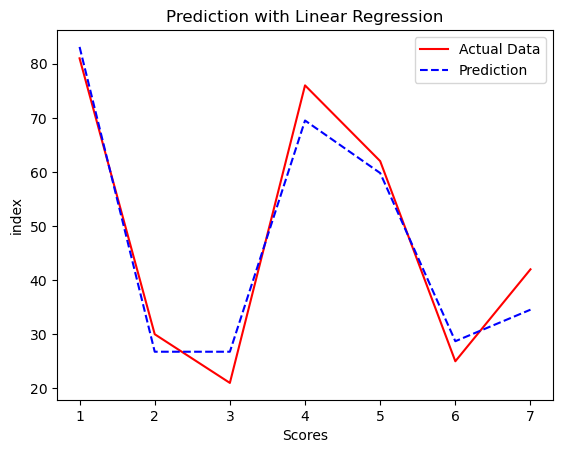

In [47]:
# Plotting the actual and predicted values

c = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(c, y_test, color = 'r', linestyle = '-', label = 'Actual Data')
plt.plot(c, y_pred_lr, color = 'b', linestyle = 'dashed', label = 'Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [49]:
# Importing the metrics for the evaluation of model
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
# Calculate R square value
rsq = r2_score(y_test, y_pred_lr)

In [53]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [55]:
# Intercept and coeff on the line
print('Intercept of the Linear Regression model:', lr_model.intercept_)
print('Coefficient of the Linear Regression:', lr_model.coef_)

Intercept of the Linear Regression model: 2.480367091505748
Coefficient of the Linear Regression: [9.71409219]


Decision Tree Regressor Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [58]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [60]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [62]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(x_test)

In [64]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [66]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

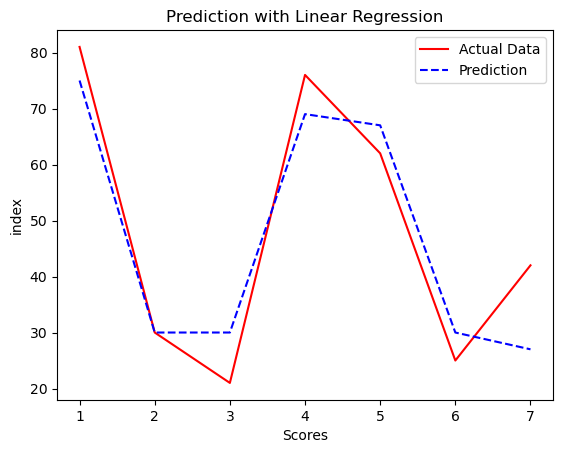

In [68]:
# Plotting the actual and predicted values

c = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(c, y_test, color = 'r', linestyle = '-', label = 'Actual Data')
plt.plot(c, y_pred_dt, color = 'b', linestyle = 'dashed', label = 'Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [70]:
# Calculate R square value
rsq_dt = r2_score(y_test, y_pred_dt)

In [72]:
print('r square Decision Tree Results:', rsq_dt)

r square Decision Tree Results: 0.8803859268443893


Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [79]:
# Predicting the Salary for the Test values
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([80.38, 27.63, 27.63, 73.32, 62.52, 29.22, 29.02])

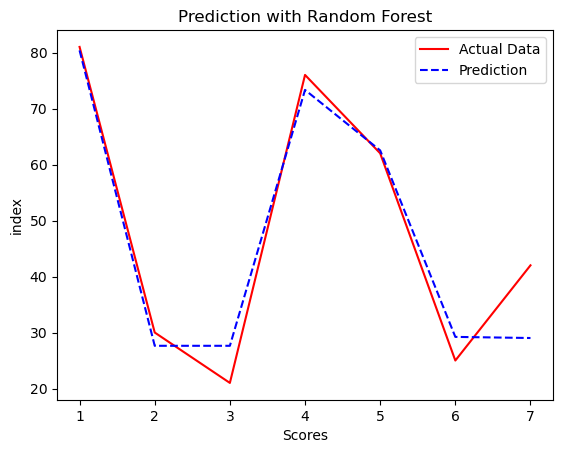

In [81]:
# Plotting the actual and predicted values

c = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(c, y_test, color = 'r', linestyle = '-', label = 'Actual Data')
plt.plot(c, y_pred_rf, color = 'b', linestyle = 'dashed', label = 'Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [83]:
# Calculate R square value
rsq_rf = r2_score(y_test, y_pred_rf)

In [85]:
print('r square Random Forest Results:', rsq_rf)

r square Random Forest Results: 0.9339003952262864


Conclusion

In [88]:
model_performance = {
    'Linear Regression': rsq,
    'Decision Tree': rsq_dt,
    'Random Forest': rsq_rf
}

In [90]:
best_model = max(model_performance, key = model_performance.get)
print(f"The best model is: {best_model} with a score of {model_performance[best_model]}")

The best model is: Linear Regression with a score of 0.9553509219739938
